This is the code for the Example 16. in the main text.
The following image is the SCM that we implement.

- Unobserved nodes: $X_1, X_2, X_5, X_6$
- Cause node: $X_9$
- Outcome node: $X_{10}$
- Node that satisfies the backdoor criterion for a pair $(X_9, X_{10})$: $X_3, X_4$

<div>
<img src="../SCM_fig/SCM4.png" width="600"/>
</div>

- the structural equation: $X_i = f(PA(X_i)) + U_i$
  - $X_1 = U_1$
  - $X_2 = U_2$
  - $X_3 = X_1 + U_3$
  - $X_4 = -X_2^3 + X_2 + U_4$
  - $X_5 = X_3^2 + 0.1 + U_5$
  - $X_6 = X_4^2 + X_4 + U_6$
  - $X_7 = -X_3^2 + X_3 + U_7$
  - $X_8 = 3 X_4 + 0.1 + U_8$
  - $X_9 = X_5 X_8 + X_5 + X_8 + U_8$
  - $X_{10} = X_6 X_7 X_9 + X_6 X_7 + U_{10}$

In [2]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM4 import SCM4

  0%|          | 0/5 [00:00<?, ?it/s]

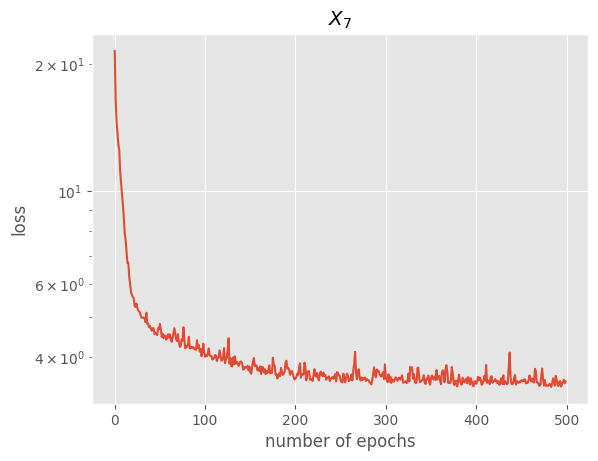

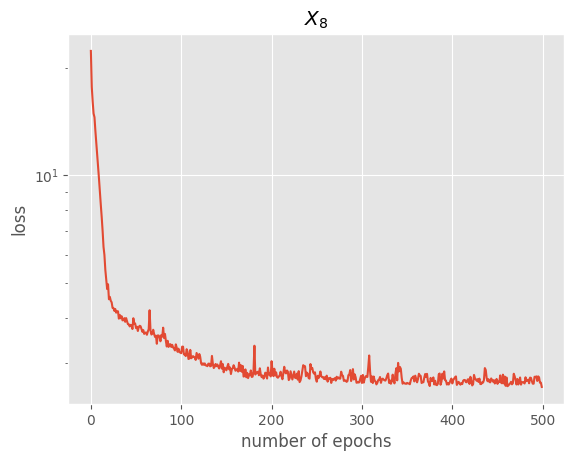

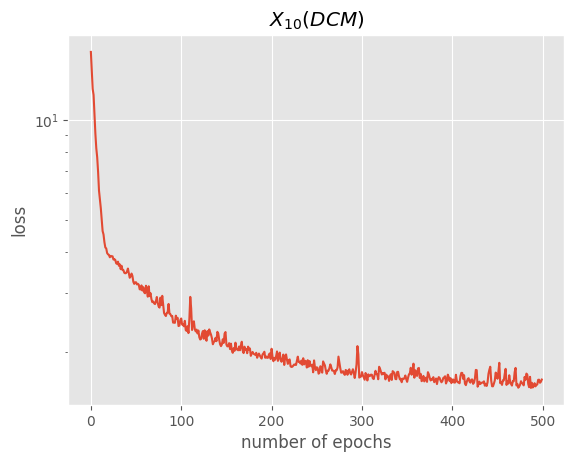

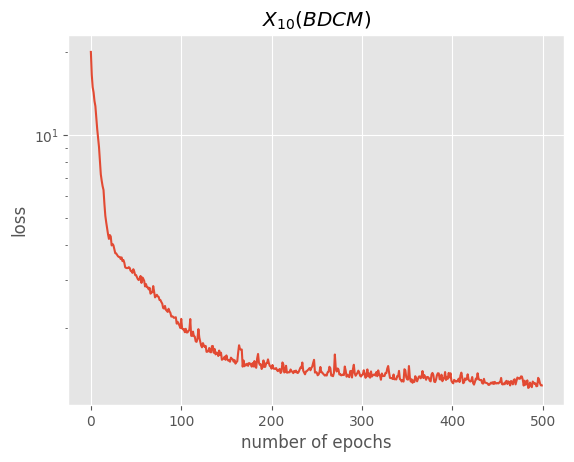

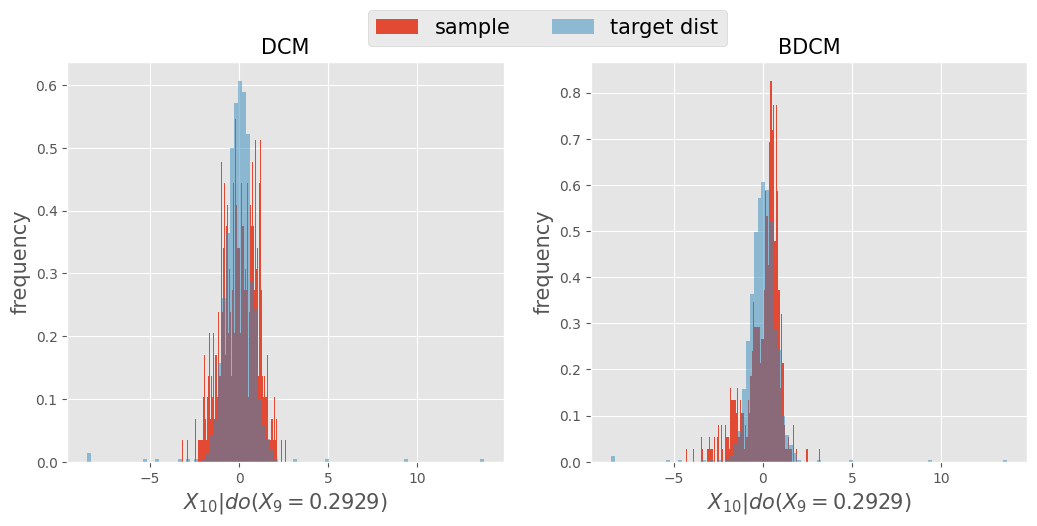

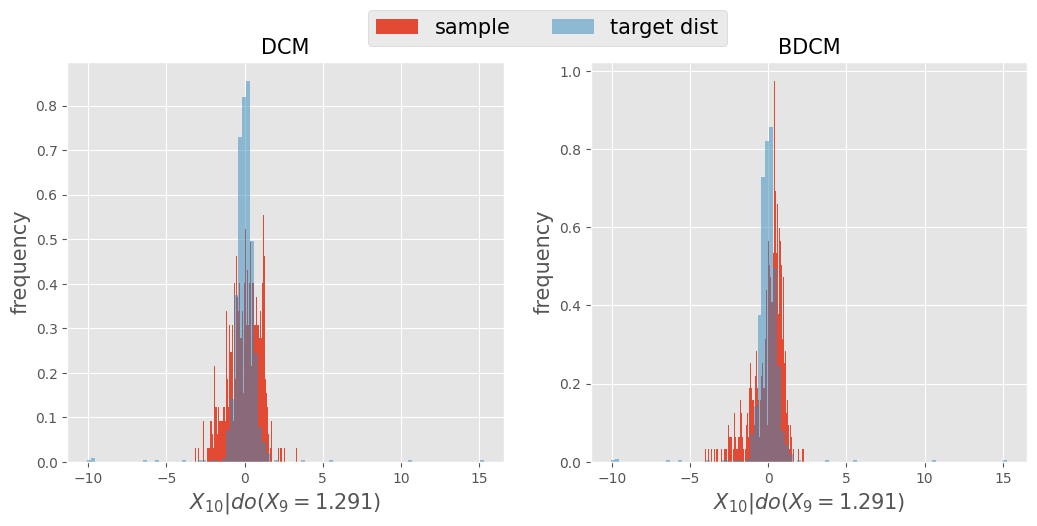

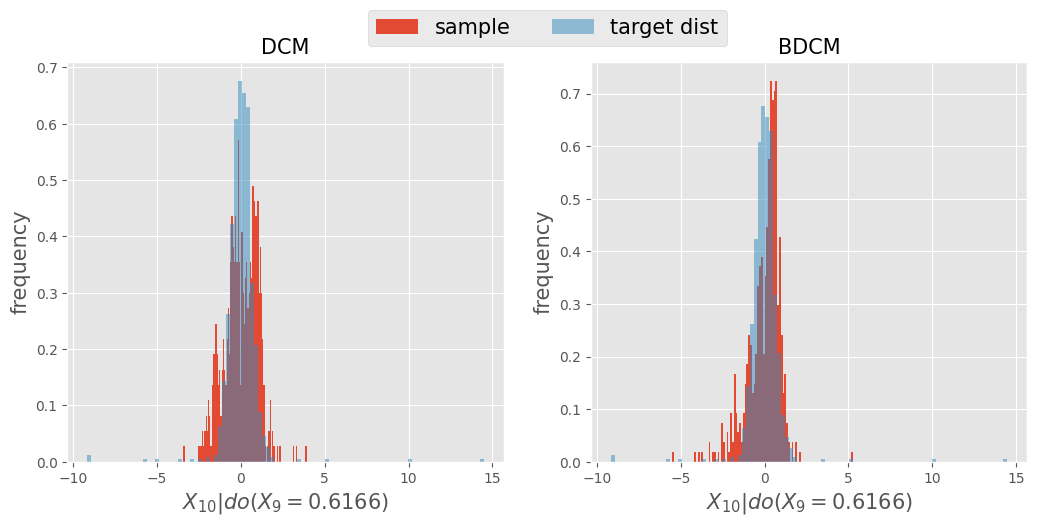

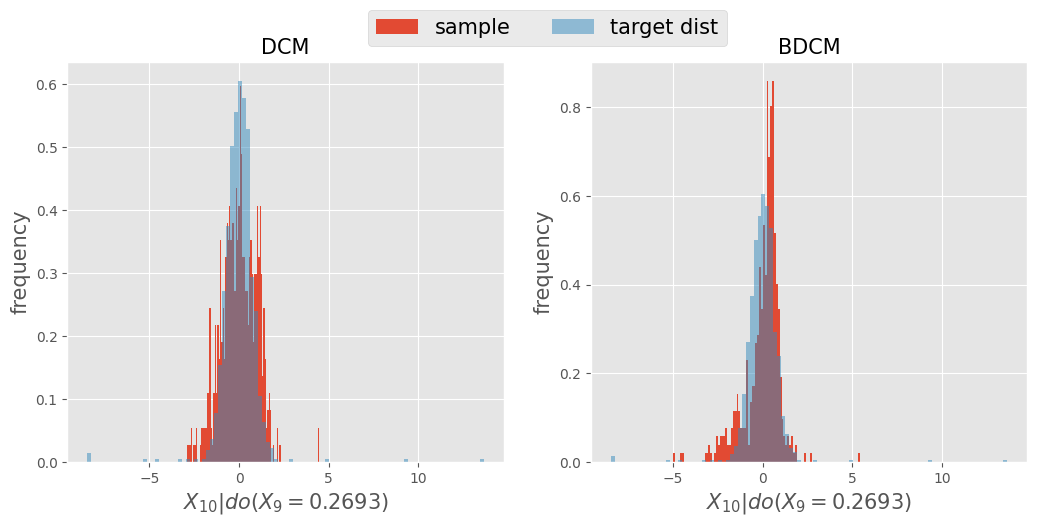

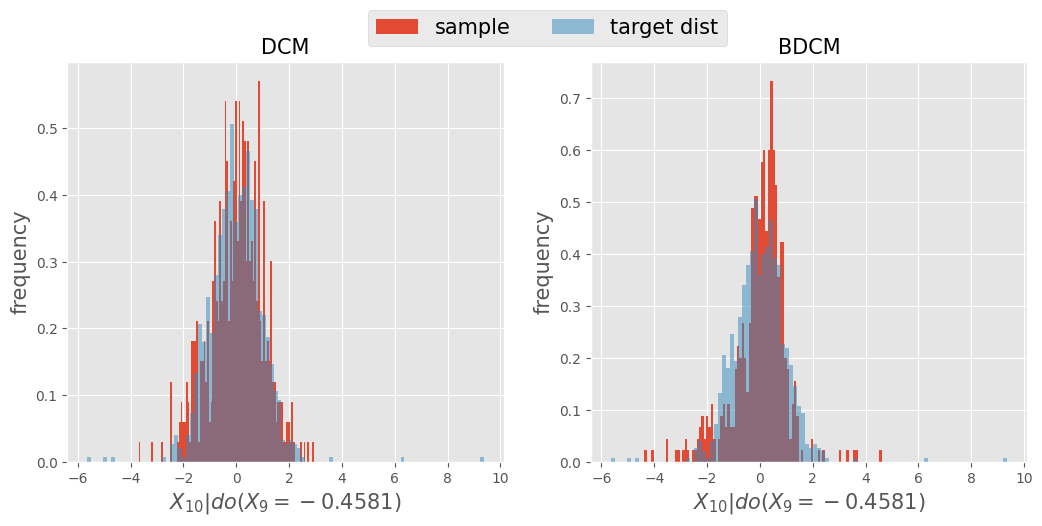

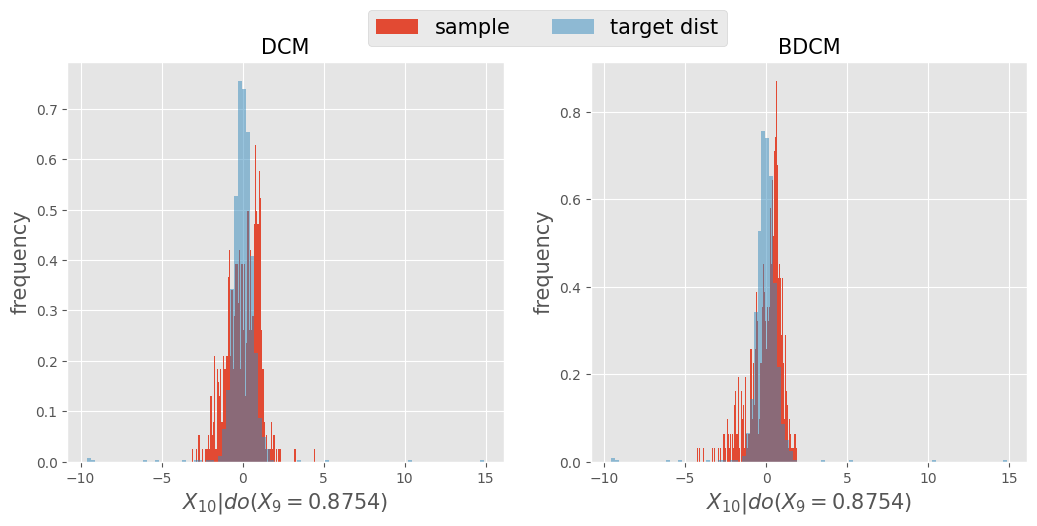

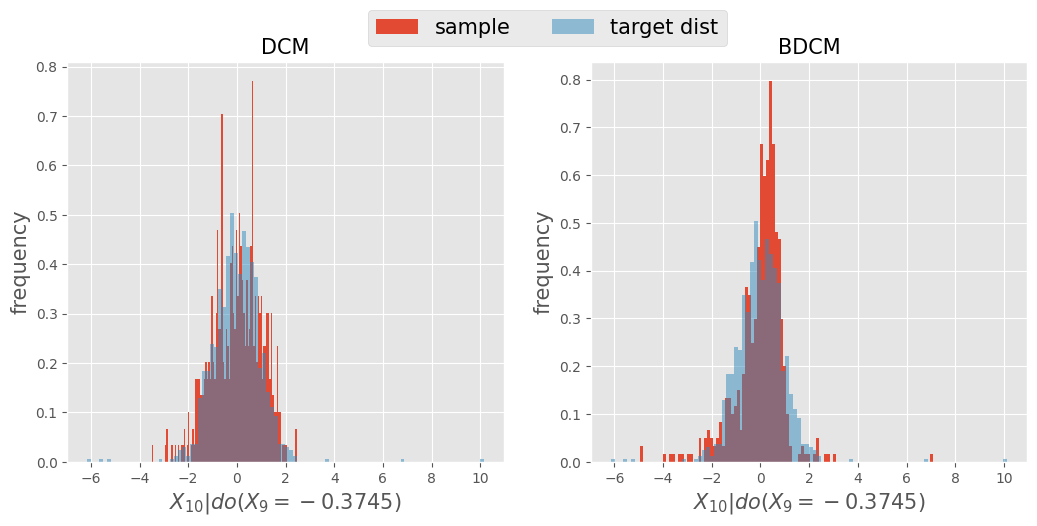

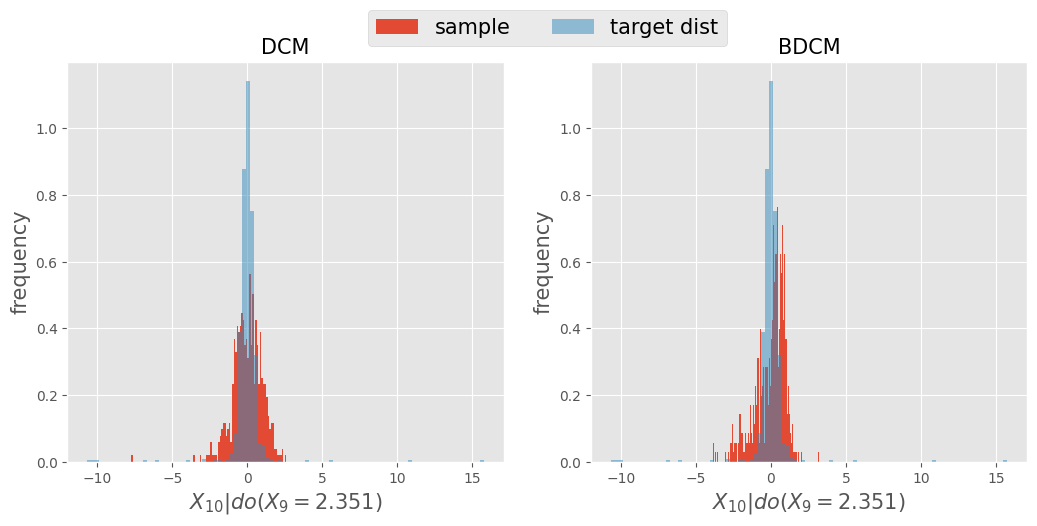

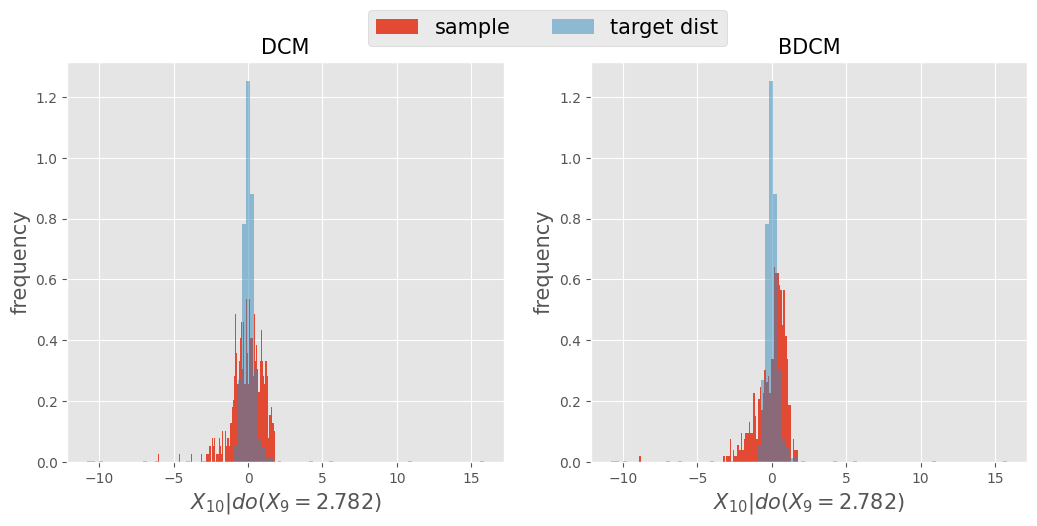

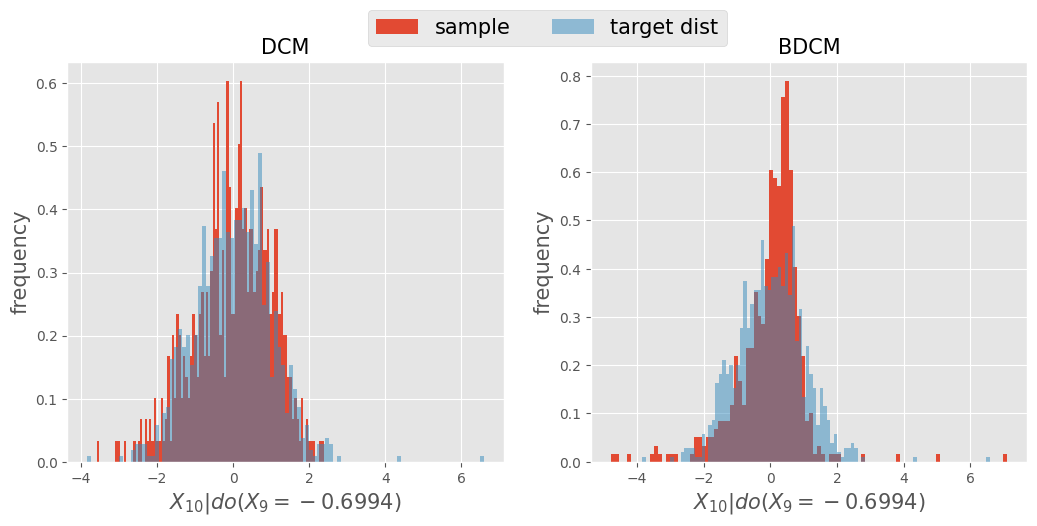

 20%|██        | 1/5 [13:54<55:36, 834.15s/it]

mean of MMD for DCM: 0.00246
standard deviation of MMD for DCM: 0.00132
mean of MMD for BDCM: 0.00247
standard deviation of MMD for BDCM: 0.00126


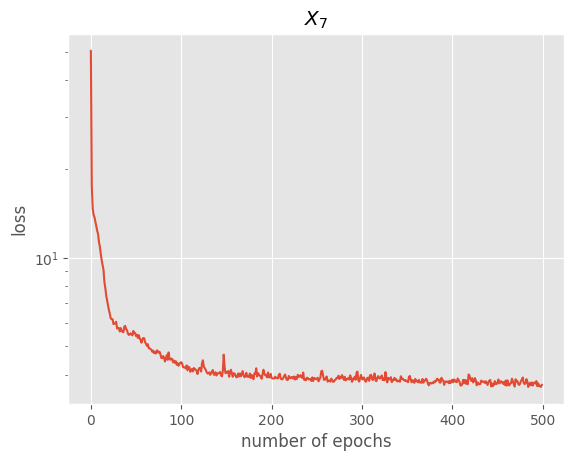

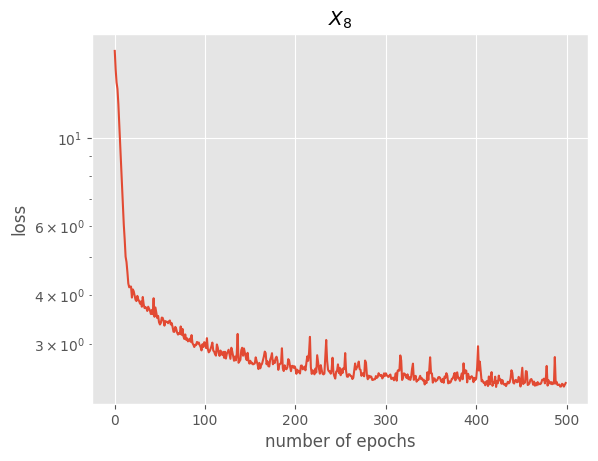

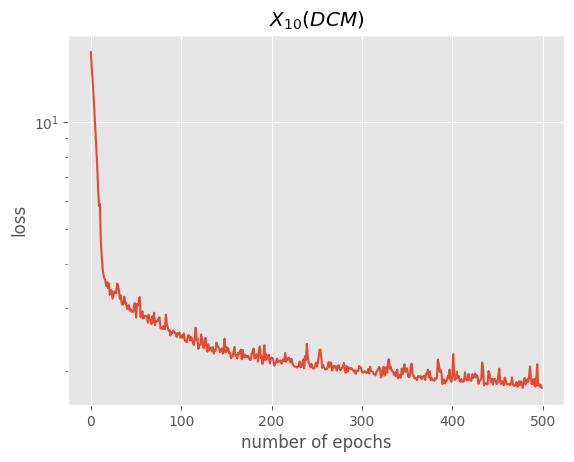

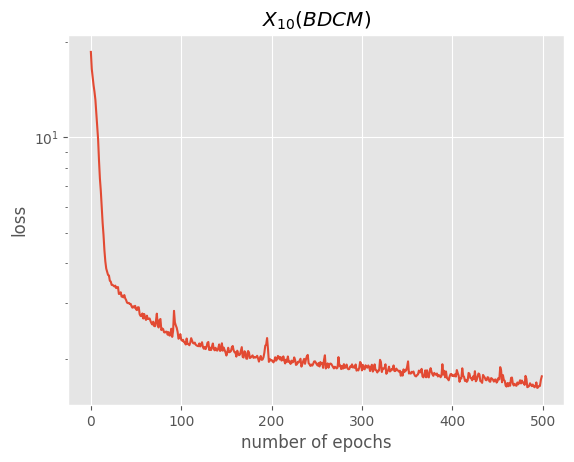

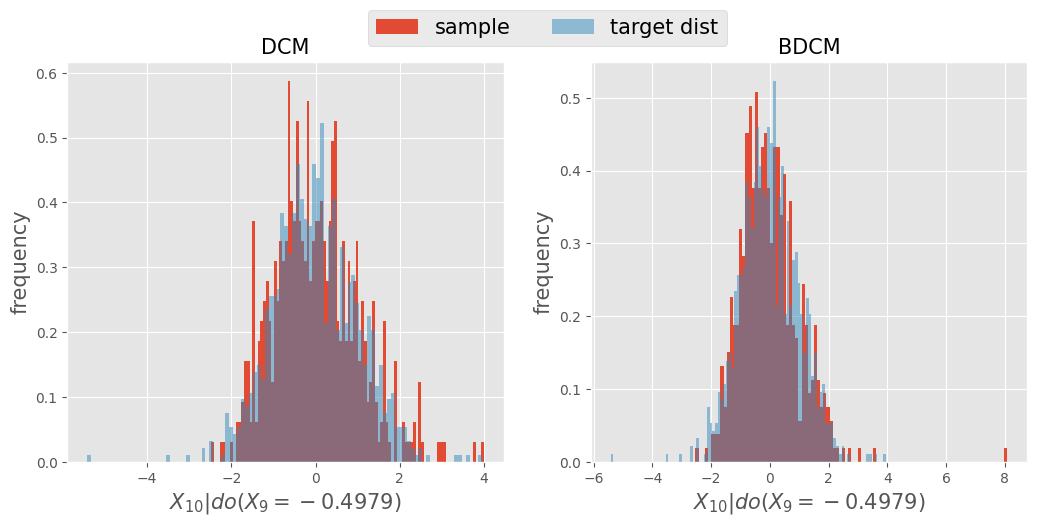

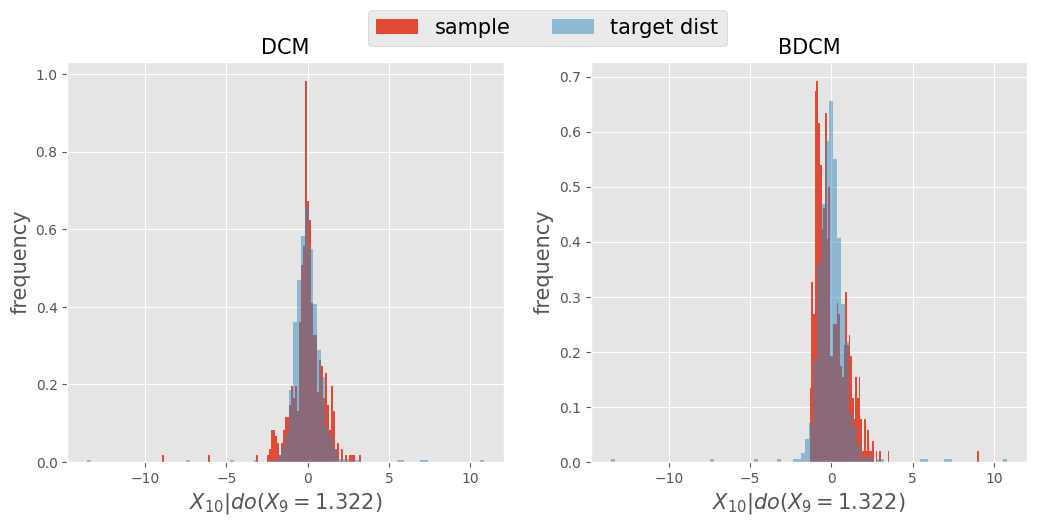

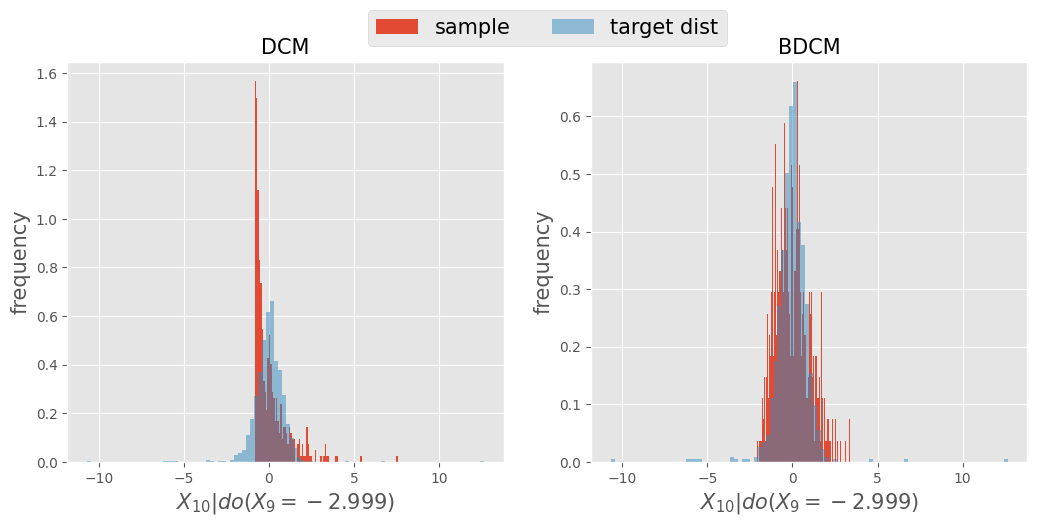

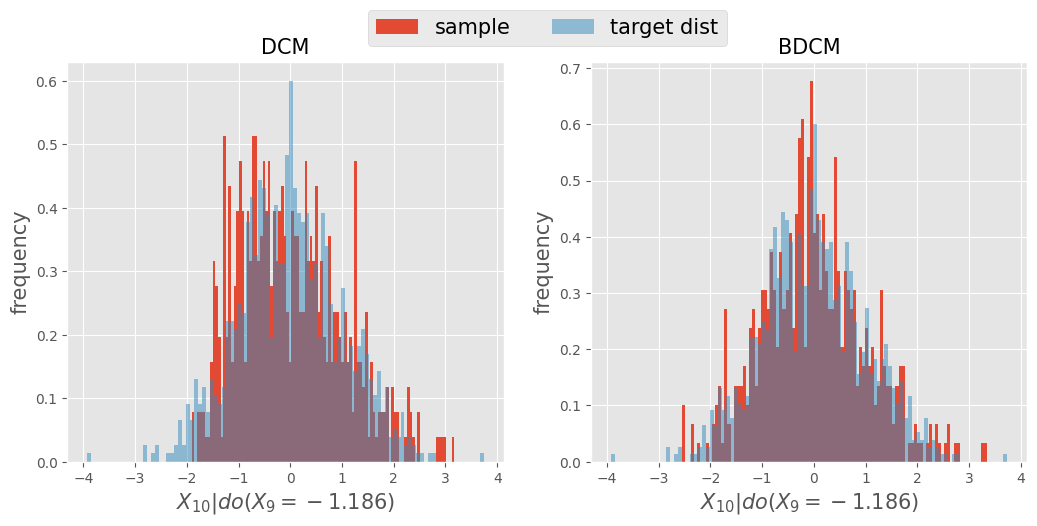

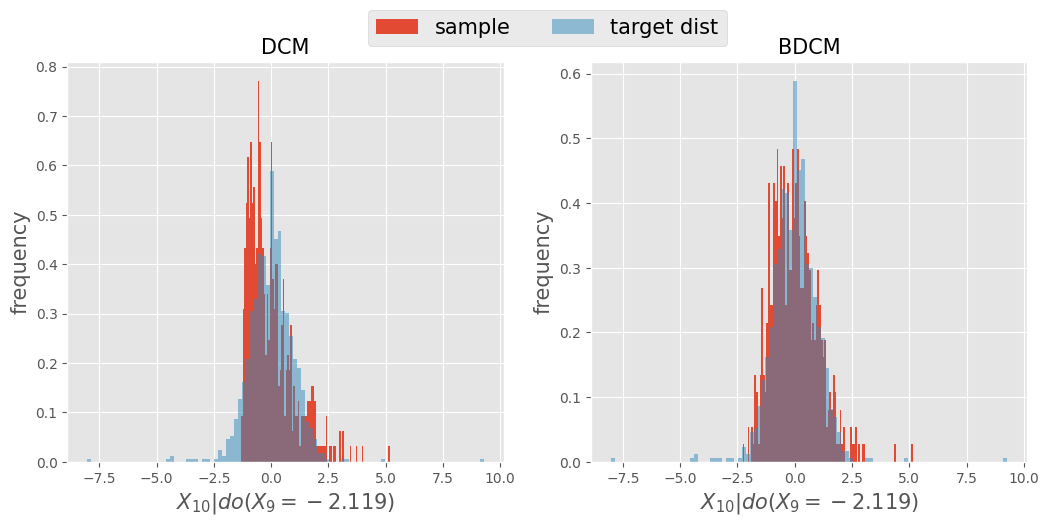

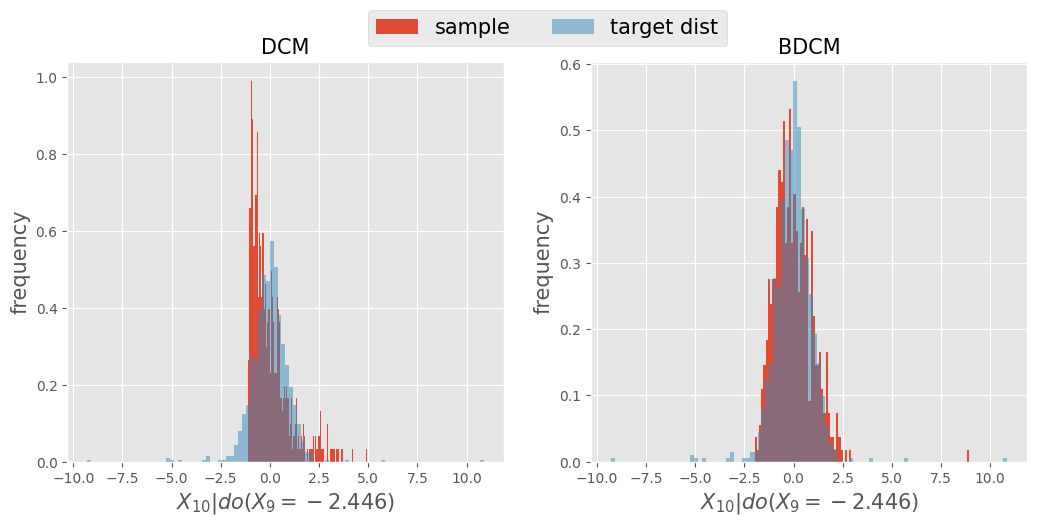

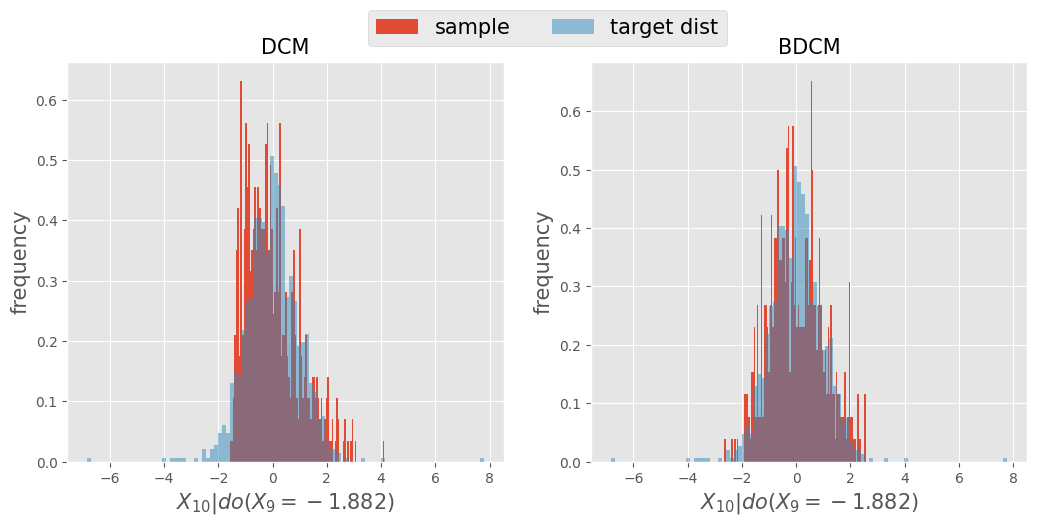

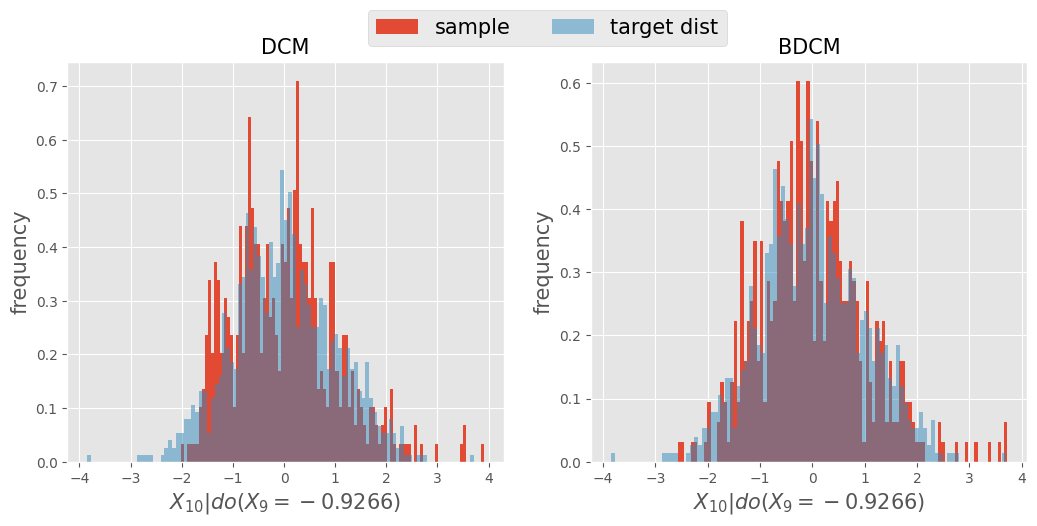

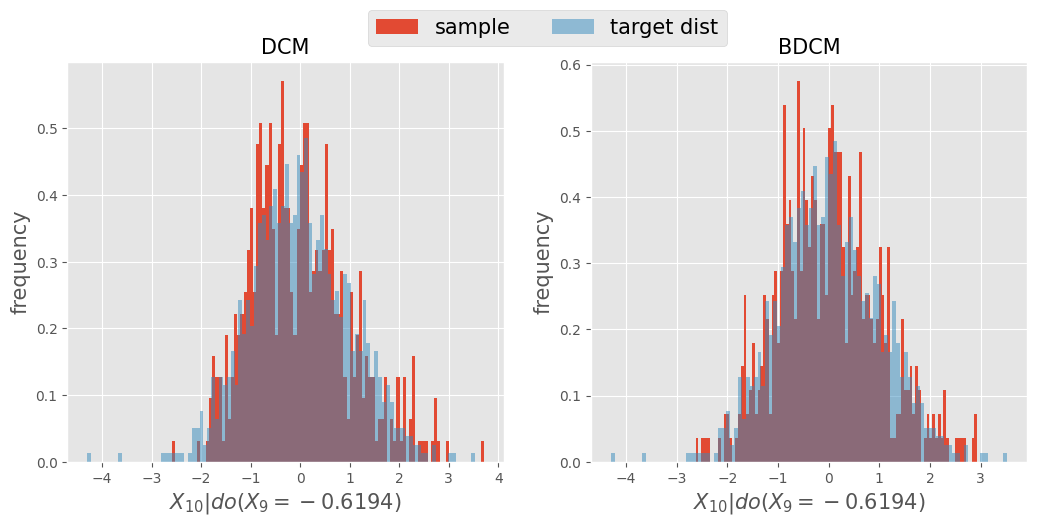

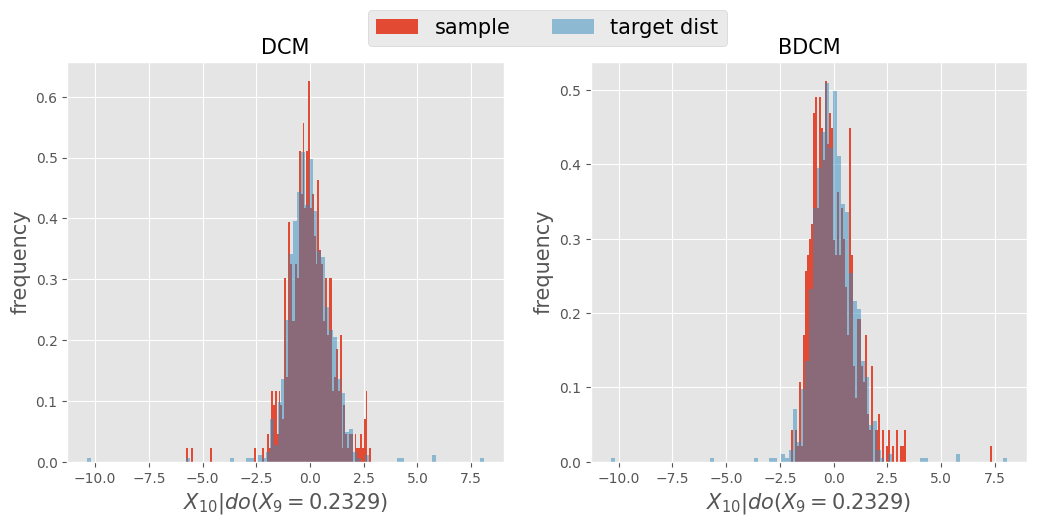

 40%|████      | 2/5 [27:42<41:31, 830.55s/it]

mean of MMD for DCM: 0.00159
standard deviation of MMD for DCM: 0.00107
mean of MMD for BDCM: 0.0013
standard deviation of MMD for BDCM: 0.000461


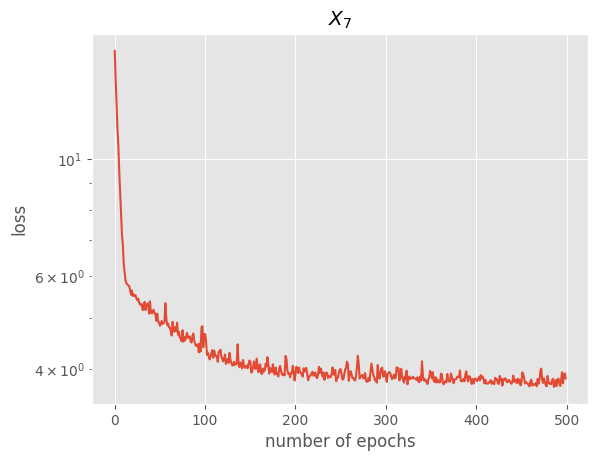

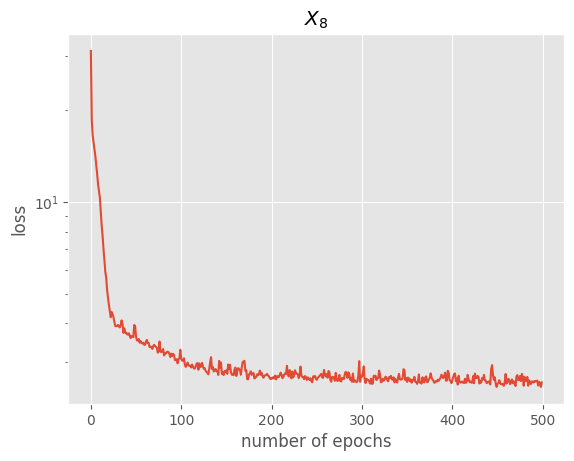

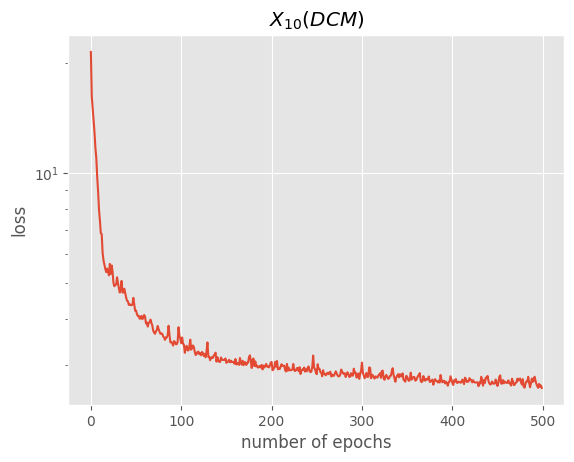

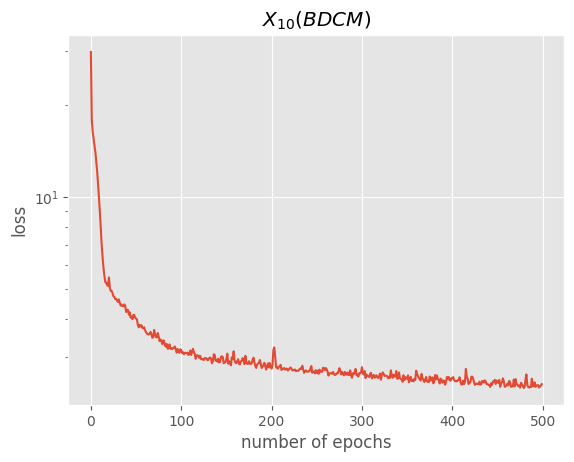

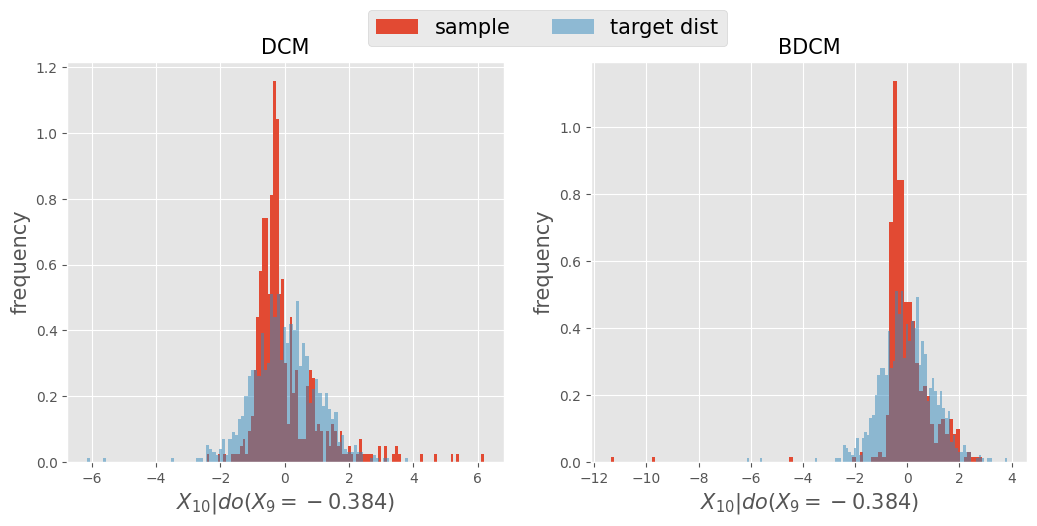

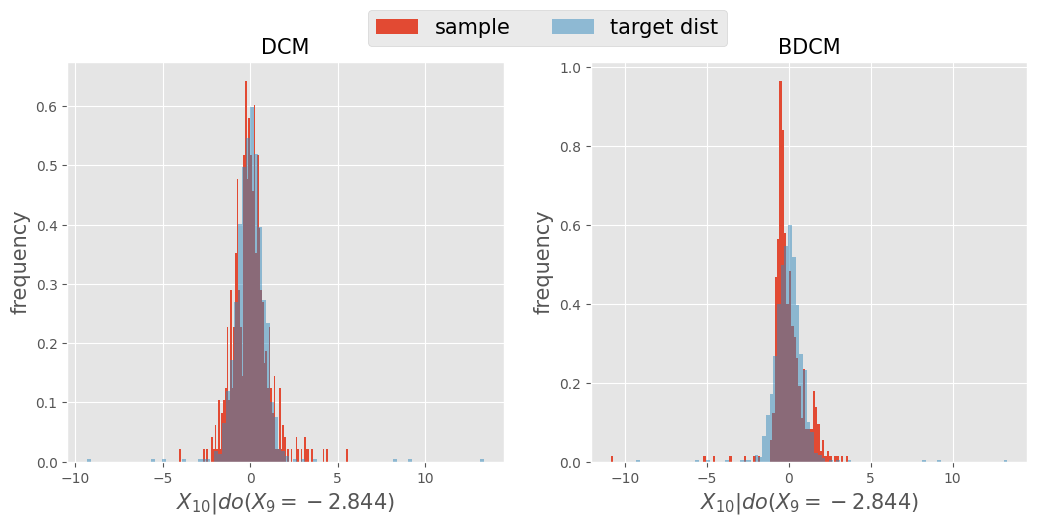

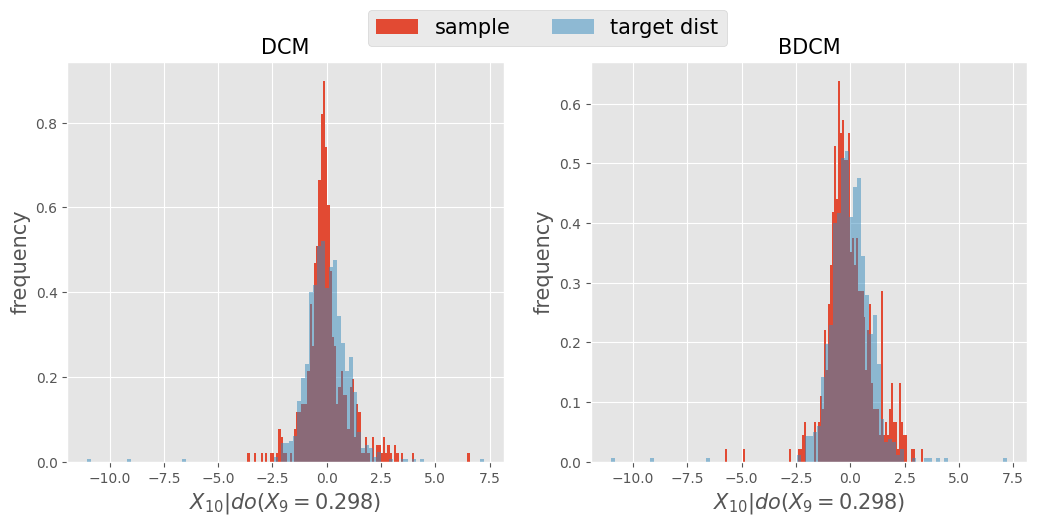

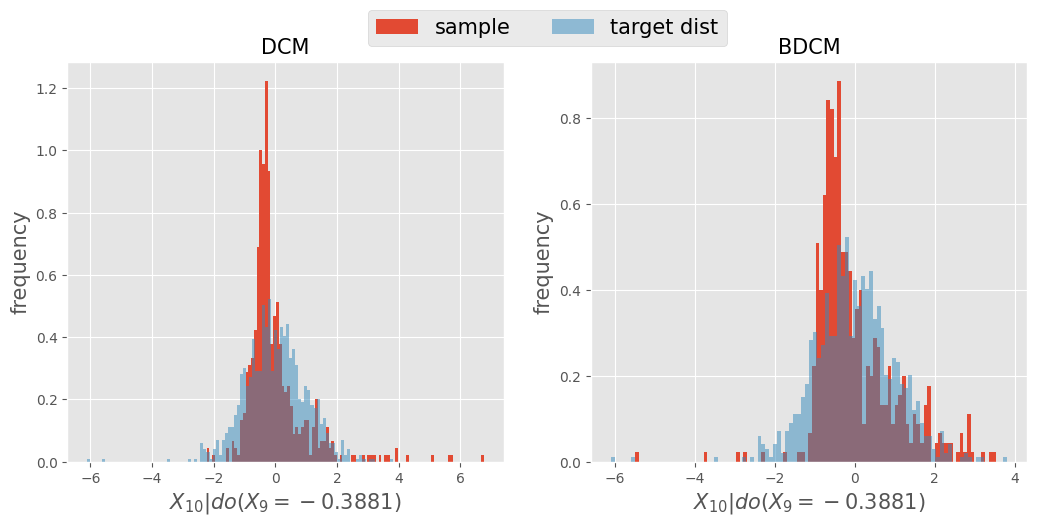

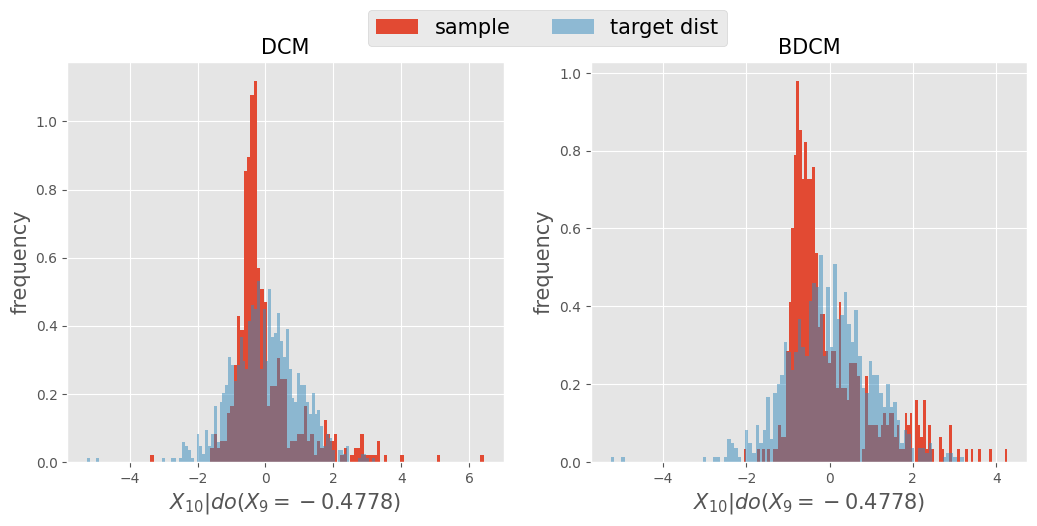

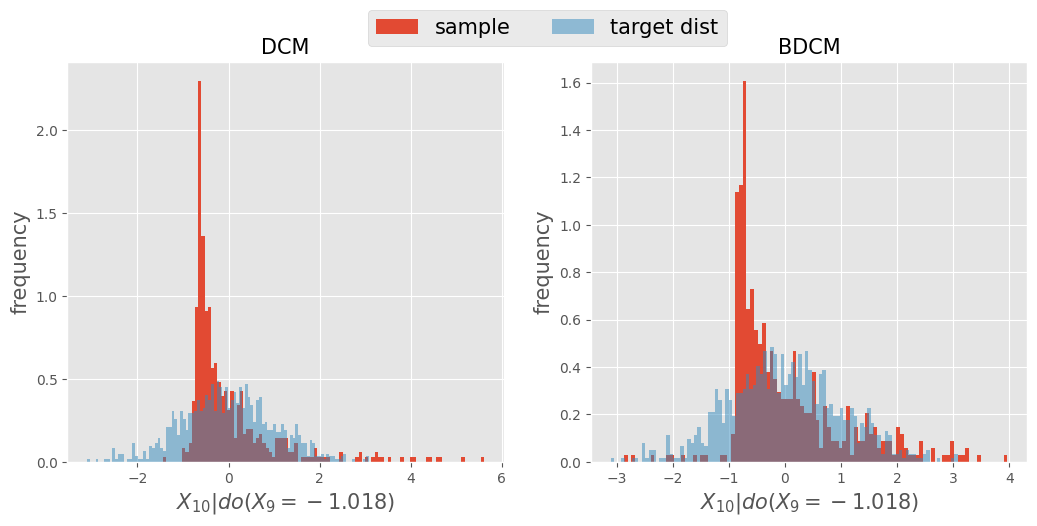

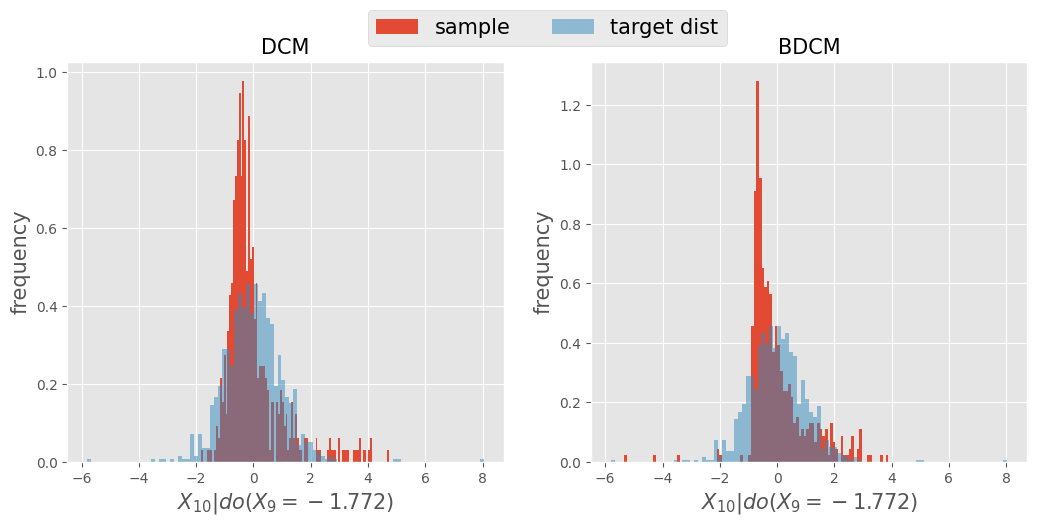

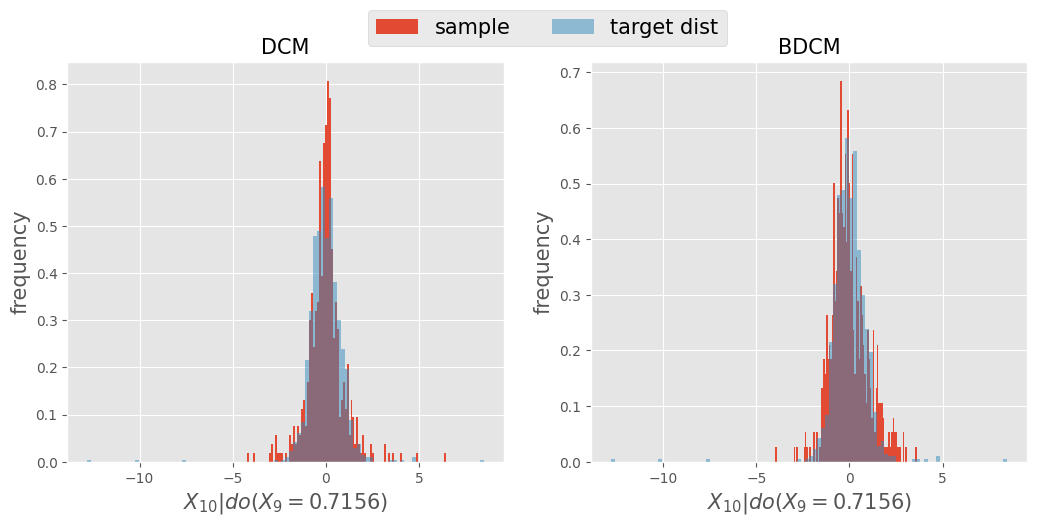

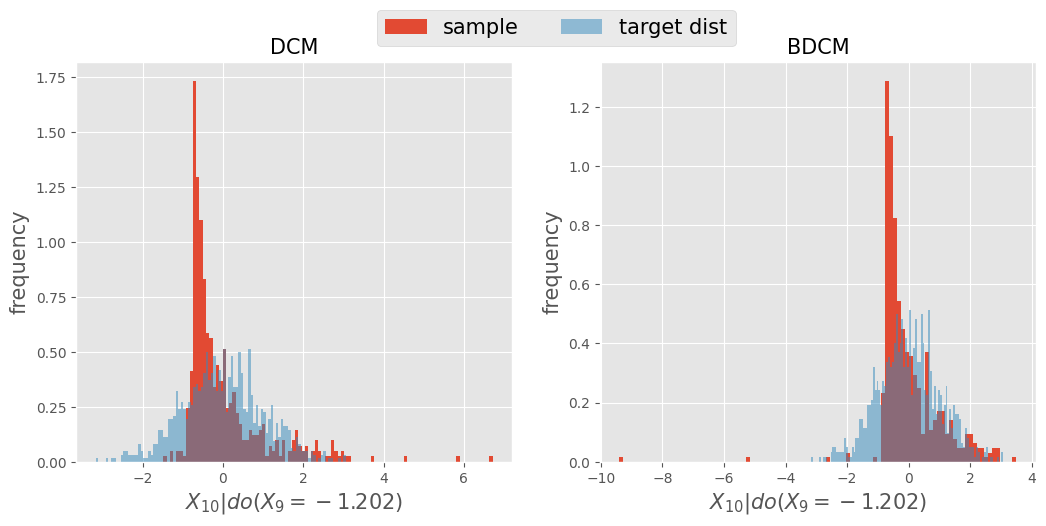

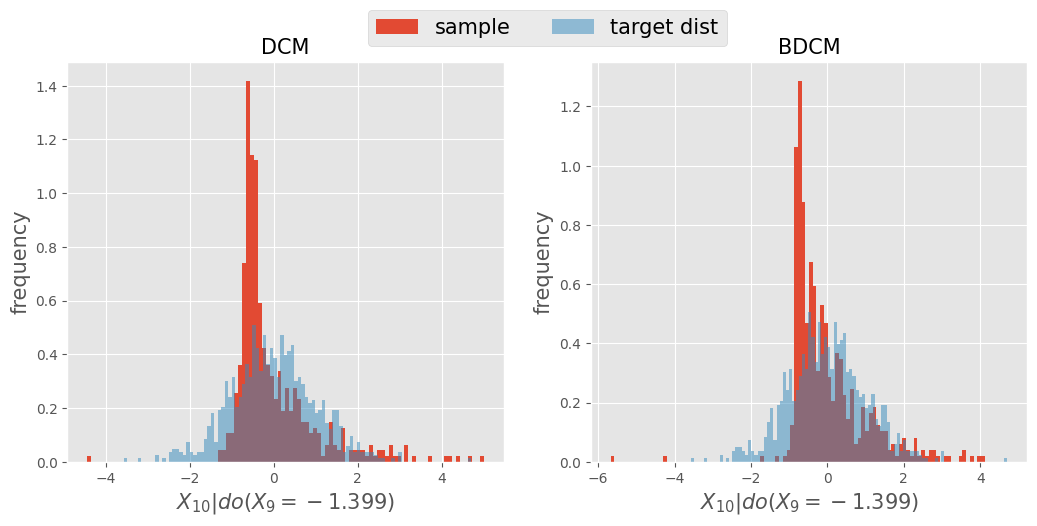

 60%|██████    | 3/5 [42:07<28:12, 846.25s/it]

mean of MMD for DCM: 0.00184
standard deviation of MMD for DCM: 0.000564
mean of MMD for BDCM: 0.000931
standard deviation of MMD for BDCM: 0.000444


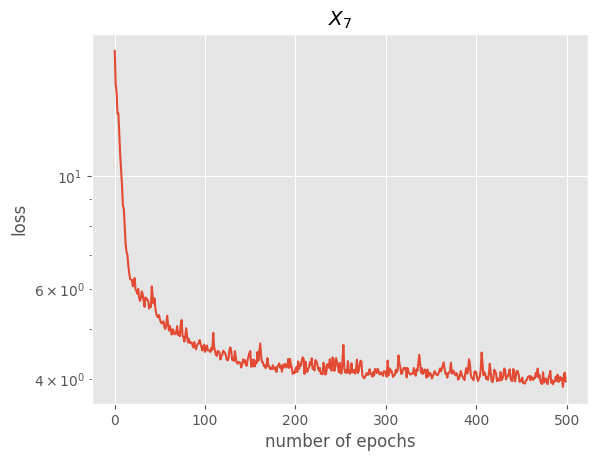

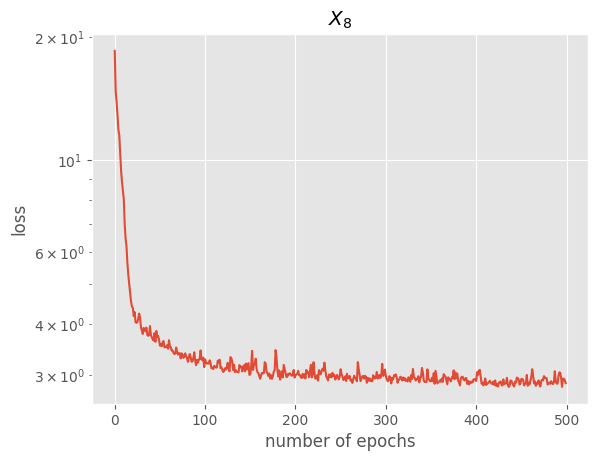

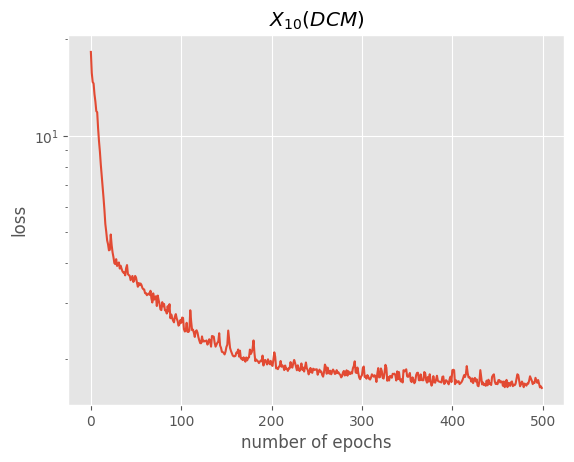

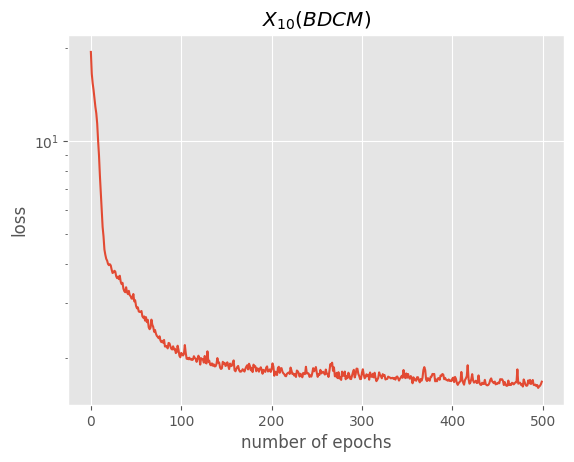

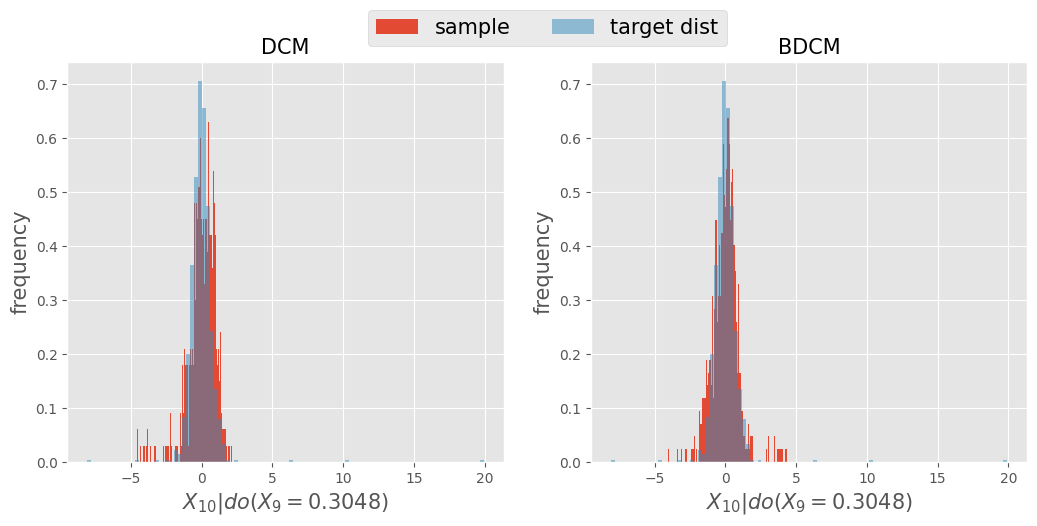

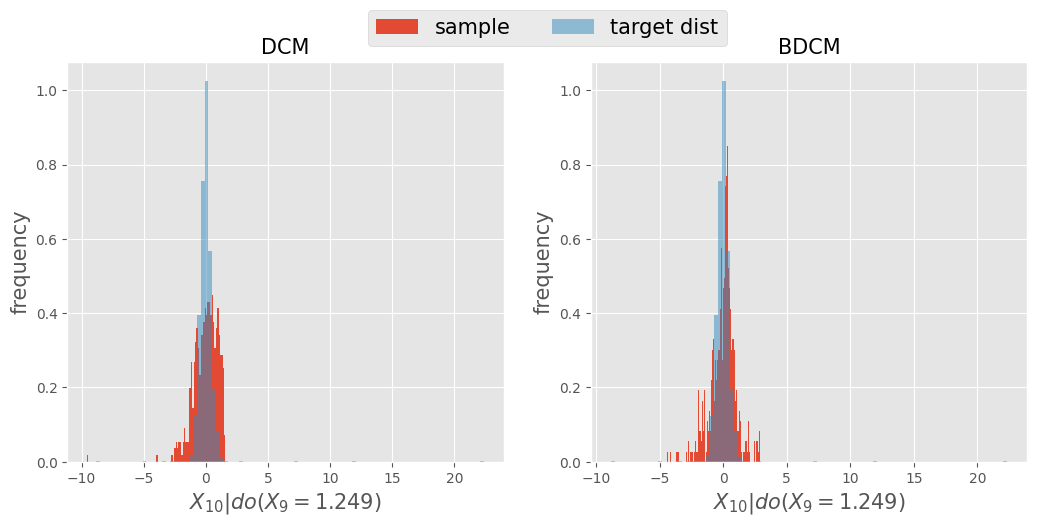

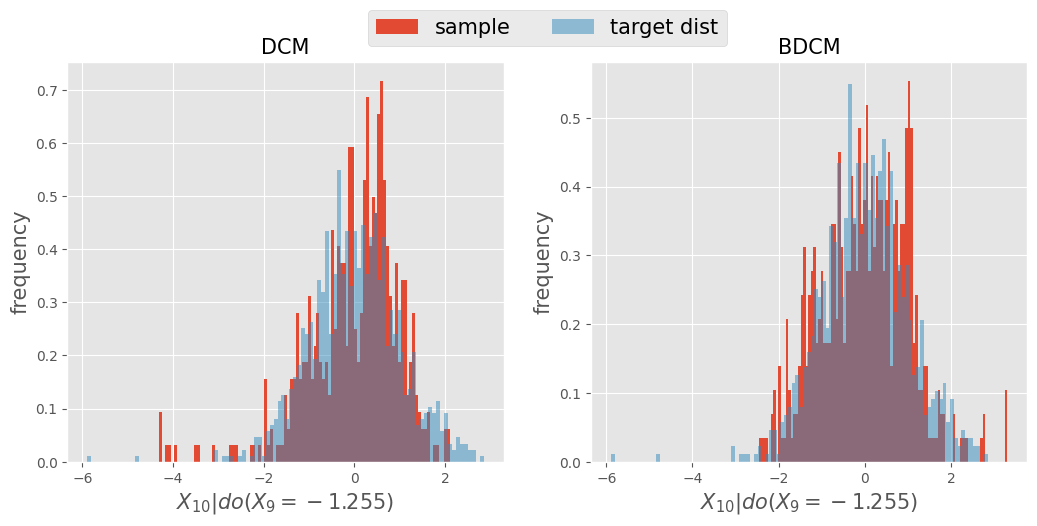

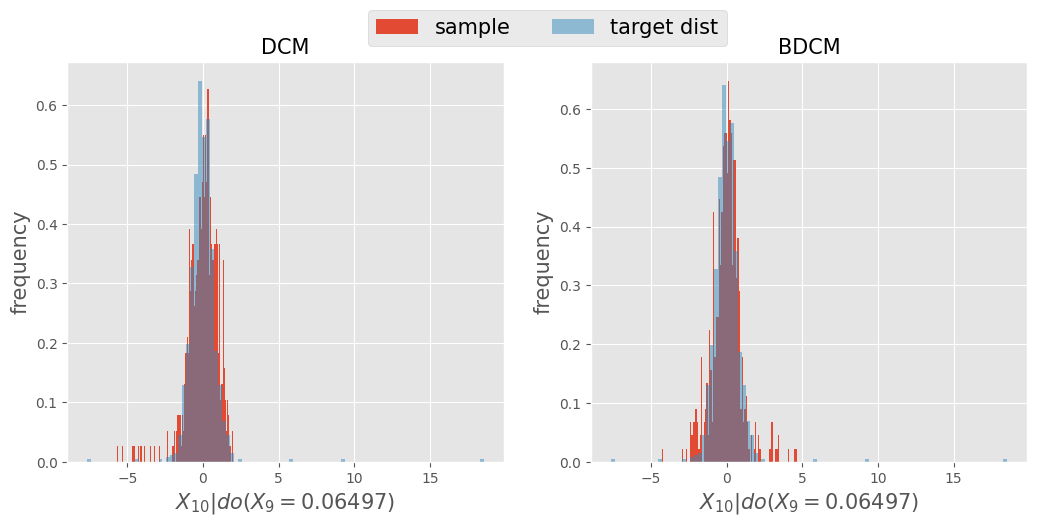

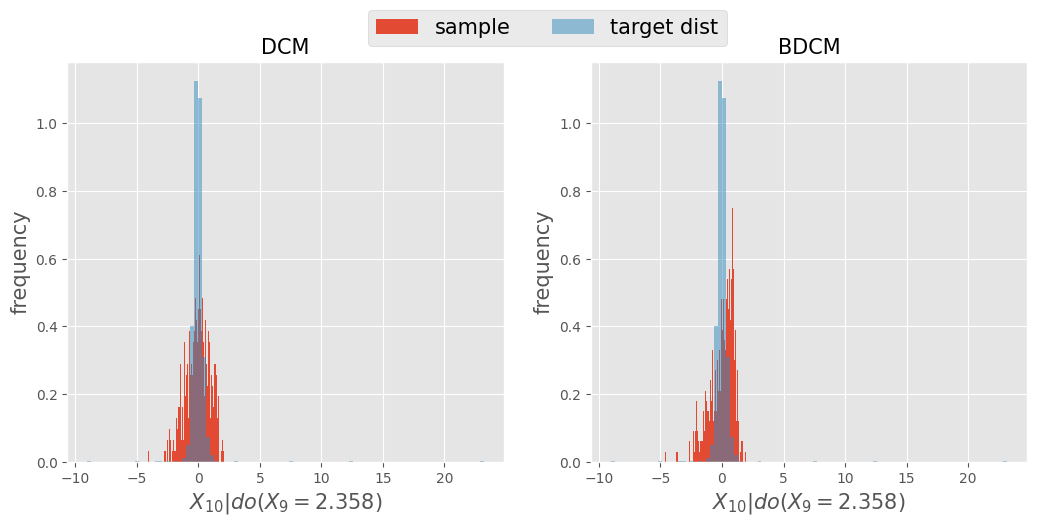

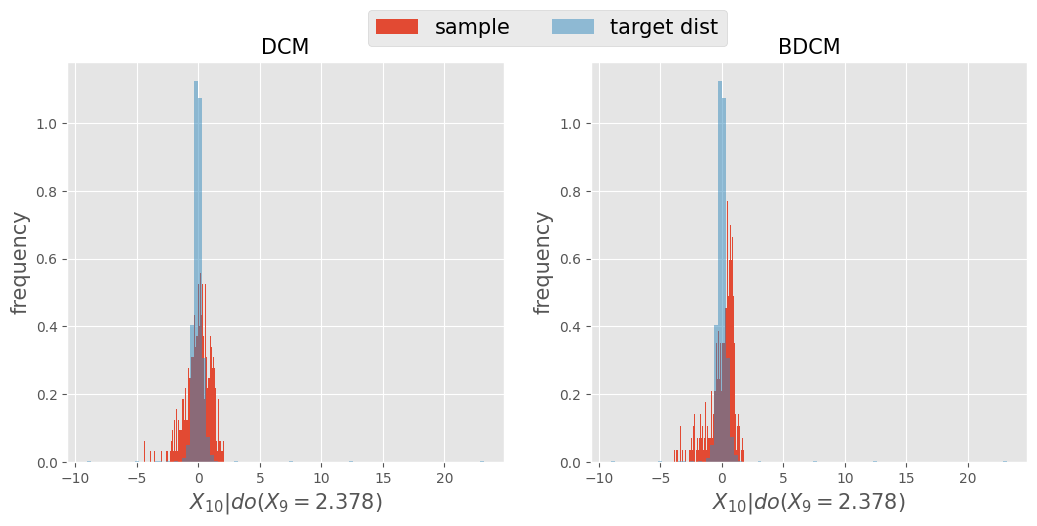

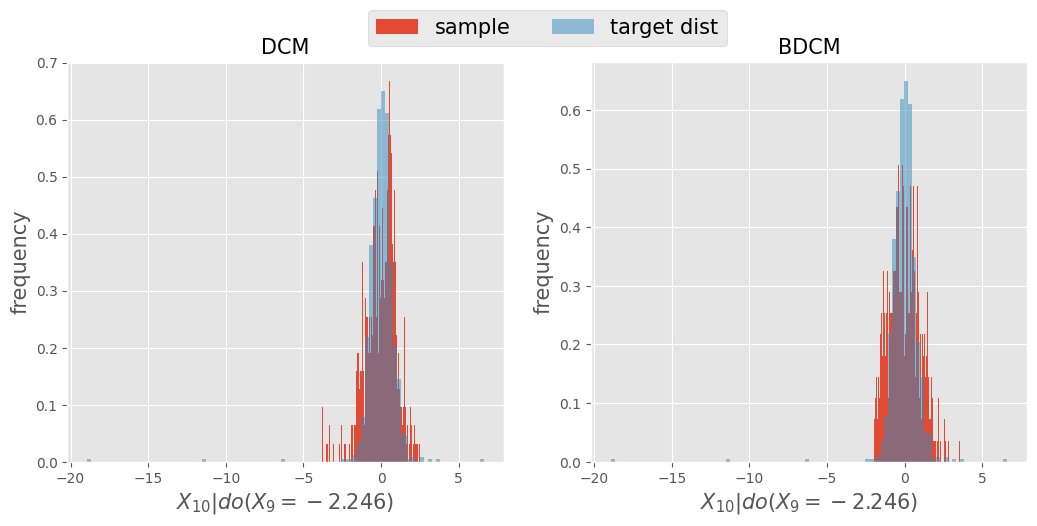

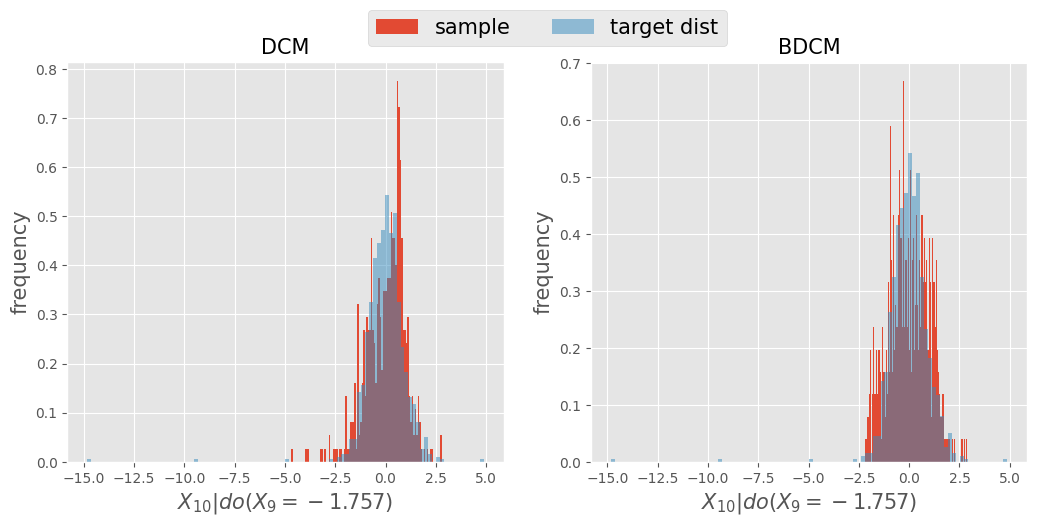

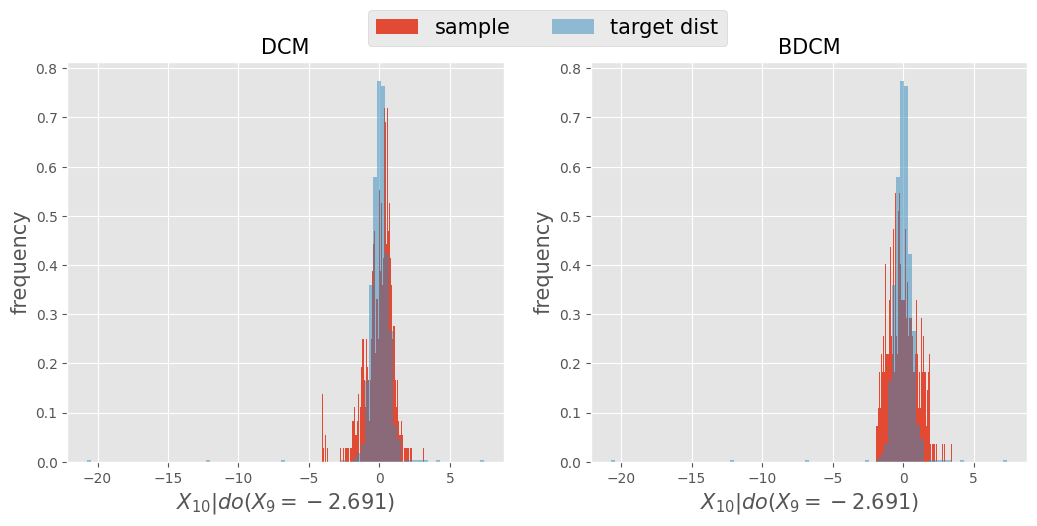

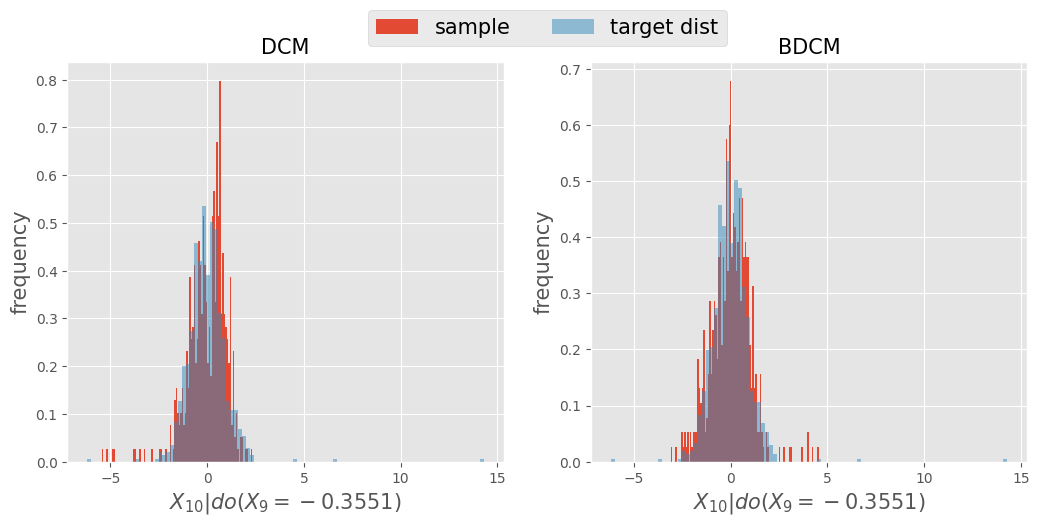

 80%|████████  | 4/5 [56:33<14:14, 854.20s/it]

mean of MMD for DCM: 0.00273
standard deviation of MMD for DCM: 0.002
mean of MMD for BDCM: 0.0028
standard deviation of MMD for BDCM: 0.00231


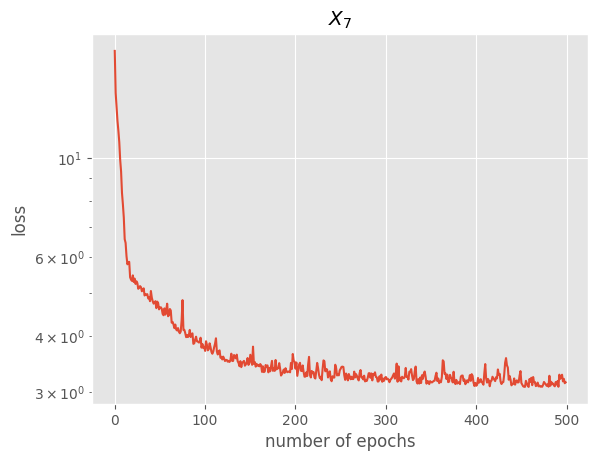

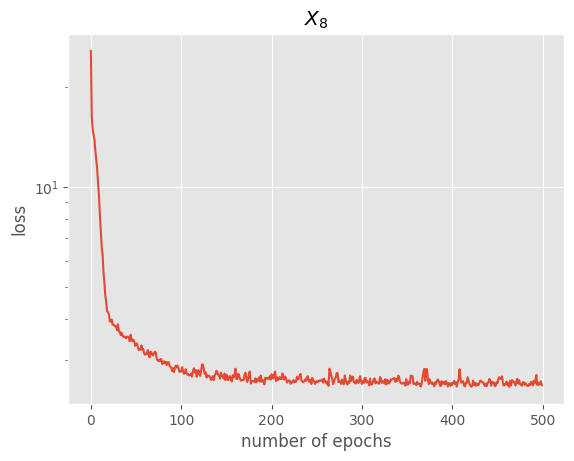

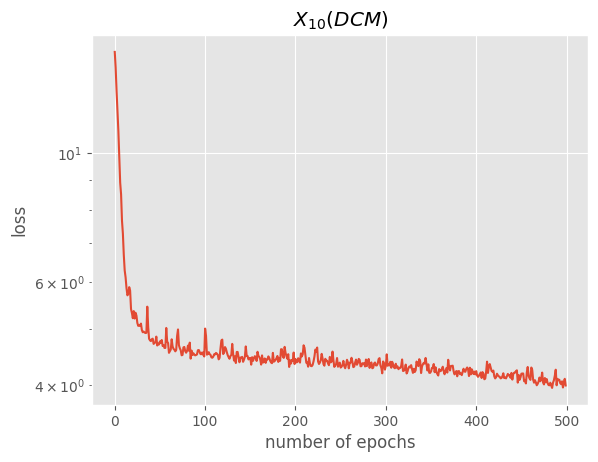

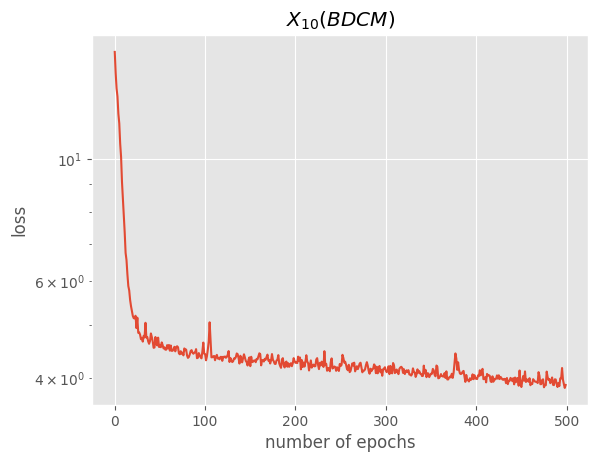

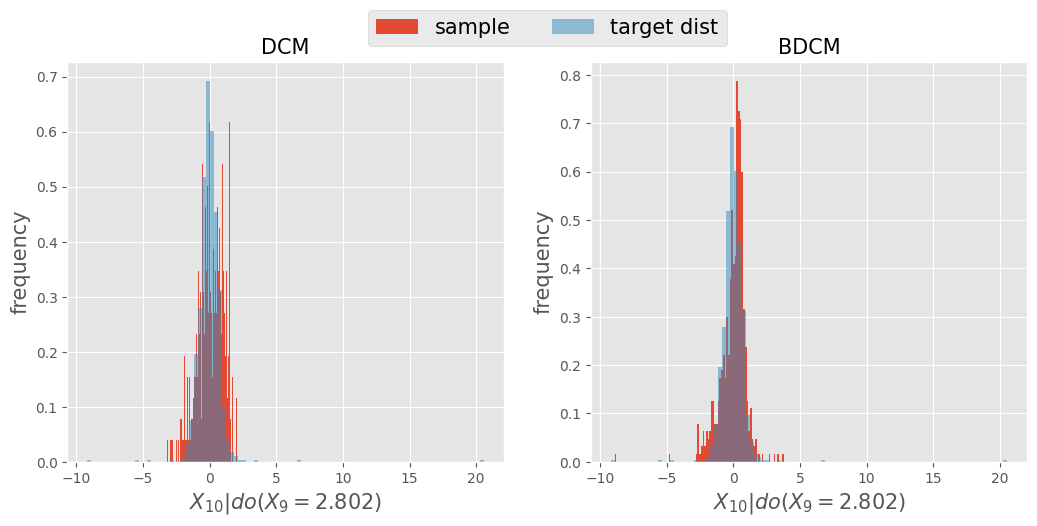

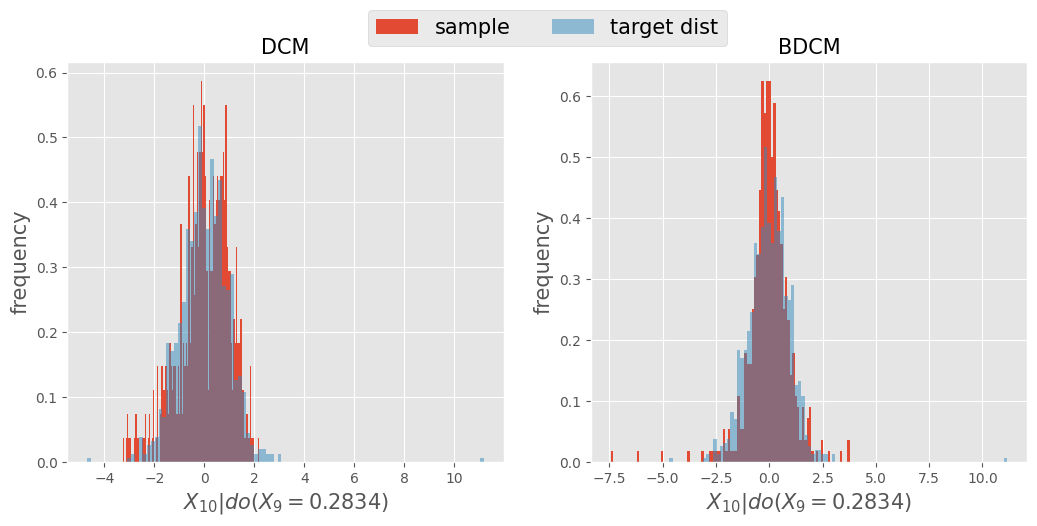

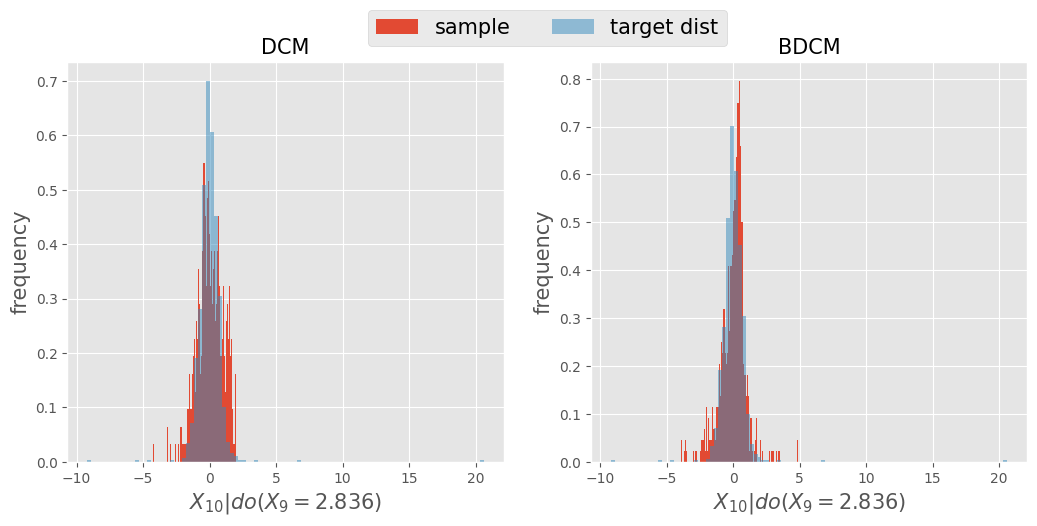

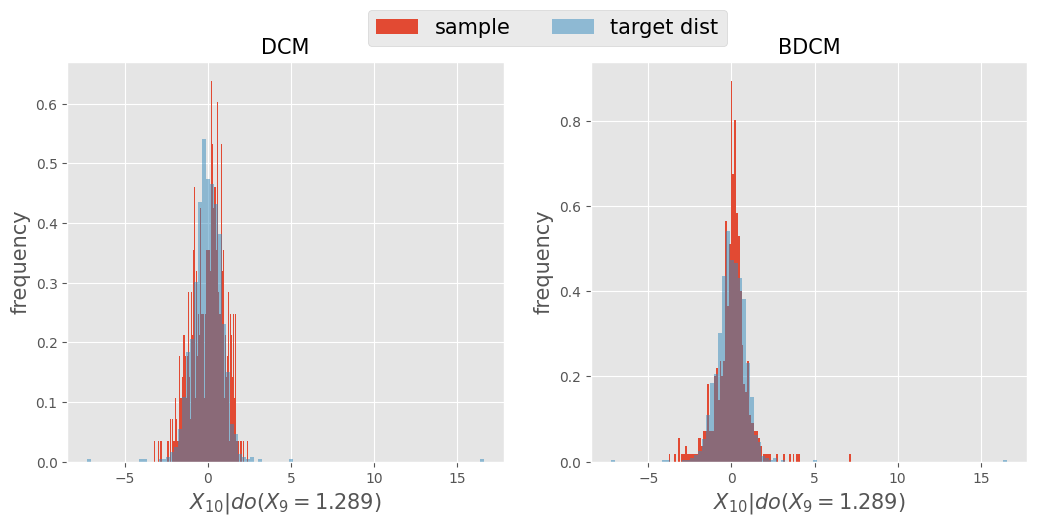

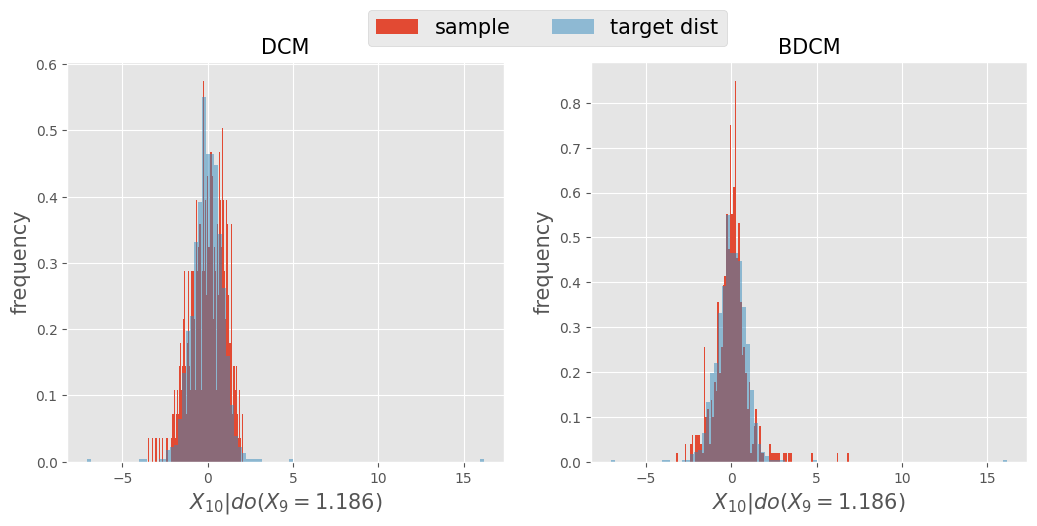

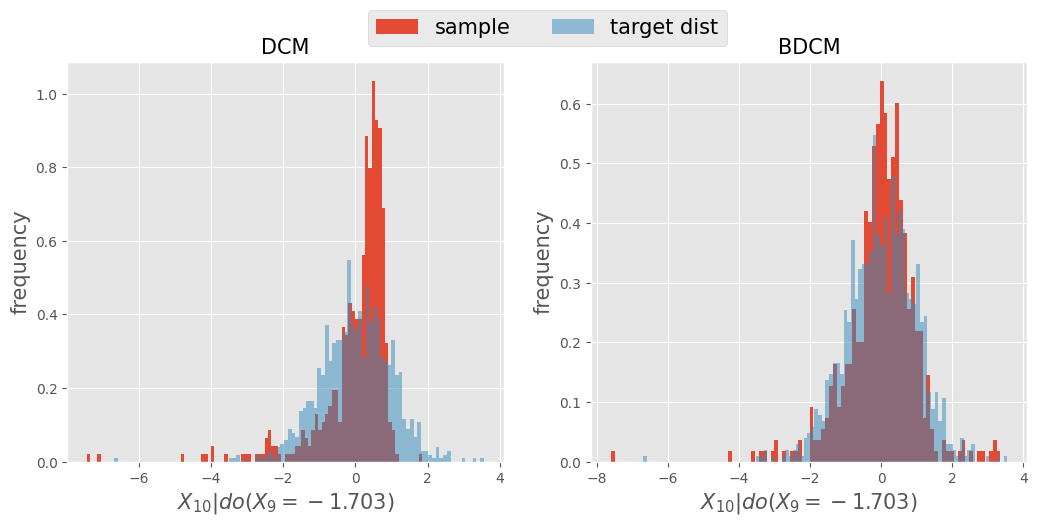

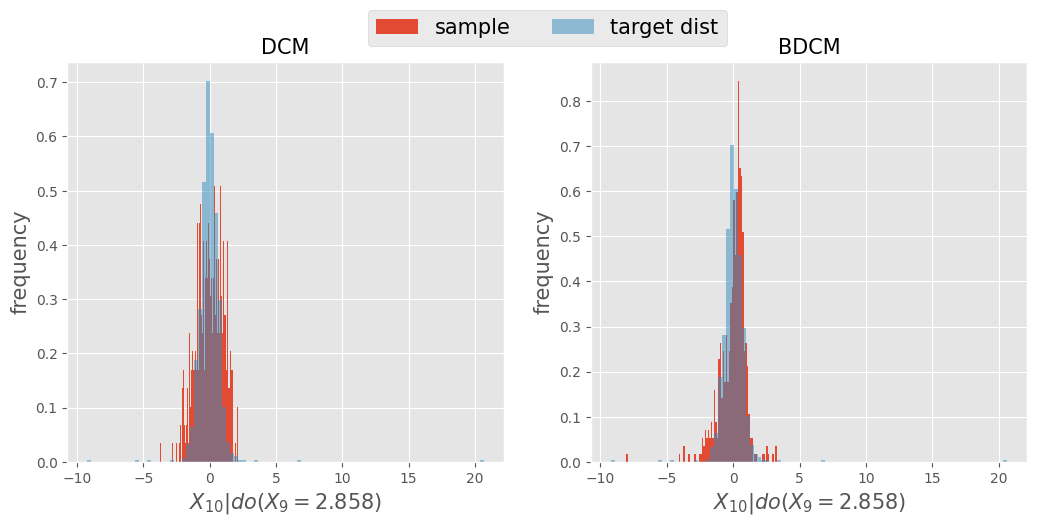

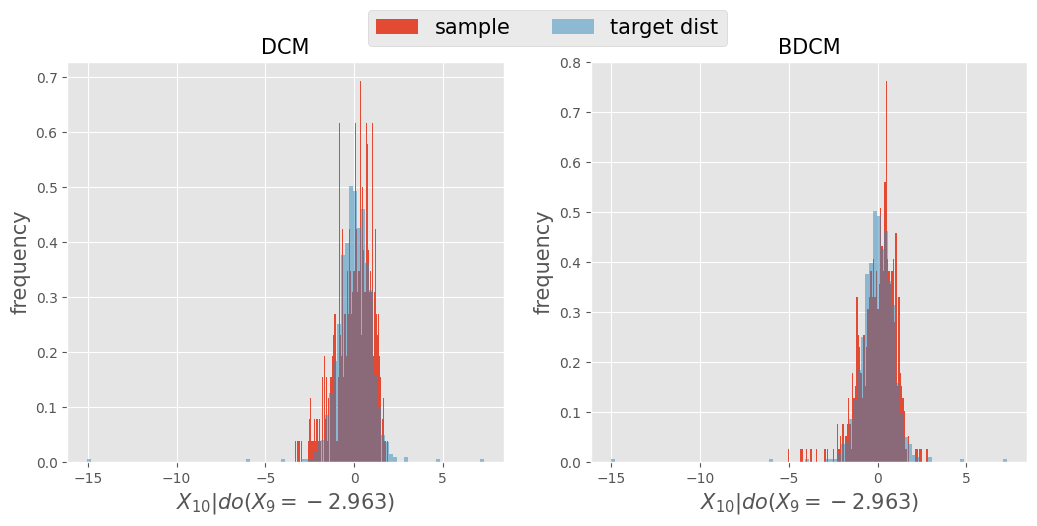

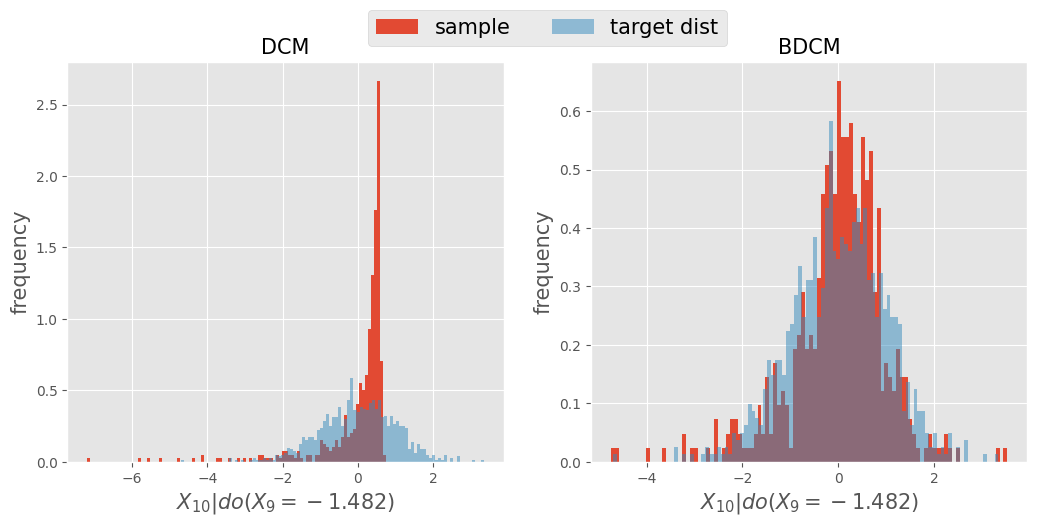

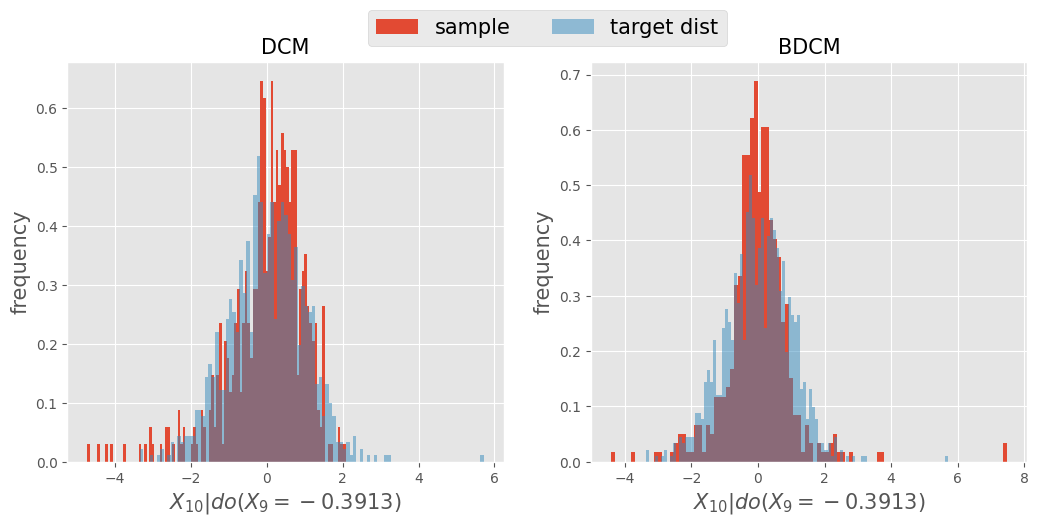

100%|██████████| 5/5 [1:10:49<00:00, 849.86s/it]

mean of MMD for DCM: 0.00195
standard deviation of MMD for DCM: 0.000944
mean of MMD for BDCM: 0.000926
standard deviation of MMD for BDCM: 0.000758
mean of all MMD for DCM: 0.00212
standard deviation of all MMD for DCM: 0.00134
mean of all MMD for BDCM: 0.00169
standard deviation of all MMD for BDCM: 0.00149


In [3]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = u
  elif ind == 2:
    output = x[0] + u
  elif ind == 3:
    output = -x[1] ** 3 + x[1] + u
  elif ind == 4:
    output = x[2] ** 2 + 0.1 + u
  elif ind == 5:
    output = x[3] ** 2 + x[3] + u
  elif ind == 6:
    output = -x[2] ** 2 + x[2] + u
  elif ind == 7:
    output = 3 * x[3] + 0.1 + u
  elif ind == 8:
    output = x[4] * x[7] + x[4] + x[7] + u
  elif ind == 9:
    output = x[5] * x[6] * x[8] + x[5] * x[6] + u
  return normalize(output)

SCM4(structural_eq=structural_eq, simple_or_complex = "simple")